In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score

In [2]:
df=pd.read_csv(r"C:\Users\NTCUONG\notebook\training_LR\training11.csv")
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,SalePrice
0,0.042594,0.069670,0.233757,0.132539,0.078830,0.128298,0.127252,0.028799,0.092669,0.0,...,0.129430,0,0.000000,0.0,0.0,0.0,0.129430,0.0,0,208500
1,0.013152,0.082892,0.258426,0.107690,0.122852,0.120843,0.119857,0.000000,0.123243,0.0,...,0.124259,0,0.000000,0.0,0.0,0.0,0.124259,0.0,0,181500
2,0.040965,0.069394,0.308067,0.126509,0.075178,0.122255,0.121322,0.022985,0.061598,0.0,...,0.124978,0,0.000000,0.0,0.0,0.0,0.124978,0.0,0,223500
3,0.047630,0.060798,0.256542,0.126379,0.075142,0.116660,0.119209,0.000000,0.027150,0.0,...,0.123944,0,0.124409,0.0,0.0,0.0,0.000000,0.0,0,140000
4,0.036753,0.077239,0.355347,0.129696,0.066782,0.108574,0.107688,0.044761,0.074829,0.0,...,0.112651,0,0.000000,0.0,0.0,0.0,0.112651,0.0,0,250000


In [3]:
corr=df.corr()

In [4]:
df.corr().sort_values("SalePrice",ascending=False).head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,SalePrice
SalePrice,-0.142333,0.153551,0.334565,0.524853,-0.315803,-0.472650,-0.499125,0.430345,0.332447,-0.033716,...,-0.354417,NaN,-0.131030,-0.050800,-0.019783,-0.048756,-0.249486,0.333237,NaN,1.000000
GrLivArea,0.120719,0.127222,0.008331,0.458779,-0.189161,-0.218697,-0.219837,0.314464,0.031921,-0.061258,...,-0.151926,NaN,-0.057856,-0.043154,0.007535,-0.002907,-0.103951,0.118027,NaN,0.607572
BsmtQual_Ex,-0.067336,0.110156,0.067300,0.348260,-0.213320,-0.159737,-0.176944,0.292843,0.219931,-0.043845,...,-0.294995,NaN,-0.055523,-0.015651,-0.027086,-0.035153,-0.231383,0.342712,NaN,0.530566
TotalBsmtSF,-0.249588,0.188220,0.075357,0.407939,-0.225604,-0.121166,-0.151733,0.281911,0.423329,0.085864,...,-0.222430,NaN,-0.033628,-0.063965,-0.074703,0.025350,-0.163098,0.229862,NaN,0.526490
GarageCars,-0.018763,0.150428,0.031077,0.494672,-0.234319,-0.088925,-0.128104,0.308173,0.161393,-0.066607,...,-0.213203,NaN,-0.114808,-0.109711,0.015857,-0.012673,-0.130096,0.257483,NaN,0.524947
OverallQual,0.168467,0.066253,-0.315555,1.000000,0.013580,0.245853,0.217332,0.300476,0.115412,-0.102320,...,-0.132284,NaN,-0.088225,-0.040849,-0.075064,-0.019867,-0.064936,0.266964,NaN,0.524853
GarageArea,-0.093239,0.183610,0.084616,0.432730,-0.215405,-0.131911,-0.167525,0.309273,0.214881,-0.039942,...,-0.235569,NaN,-0.102522,-0.106532,-0.014841,-0.017159,-0.141364,0.262419,NaN,0.524351
KitchenQual_Ex,-0.045219,0.075053,0.082089,0.310253,-0.121018,-0.163811,-0.169290,0.214144,0.184403,-0.036469,...,-0.210962,NaN,0.004694,-0.014103,-0.024406,-0.031675,-0.205273,0.250091,NaN,0.481160
1stFlrSF,-0.239974,0.213064,0.017884,0.329802,-0.200665,-0.126223,-0.145328,0.251188,0.333430,0.065461,...,-0.210962,NaN,-0.033945,-0.040522,0.046827,0.030706,-0.160864,0.182668,NaN,0.467500
Foundation_PConc,0.095374,0.006098,-0.093198,0.553635,-0.264221,0.063893,0.026830,0.159577,0.056796,-0.147740,...,-0.176319,NaN,-0.095768,0.007612,-0.043421,-0.035719,-0.139283,0.306872,NaN,0.443080


In [5]:
def create_df(col_list):
    df_fs=df["SalePrice"]
    for col in col_list:
        df_fs=pd.concat([df[col],df_fs],axis=1)
    return df_fs

In [6]:
base_models = [
    ('lr', LinearRegression()),
    ('dt', DecisionTreeRegressor(random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=10, random_state=42)),
    ('svr', SVR(kernel='rbf'))
]
meta_model = LinearRegression()
model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

In [7]:
def eval(df_fs):
    X_train,X_test,y_train,y_test=train_test_split(df_fs.iloc[:,:-1],df_fs.iloc[:,-1],test_size=0.2,random_state=42)
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    k.append(i)
    mae.append(mean_absolute_error(y_test,y_pre))
    rmse.append(root_mean_squared_error(y_test,y_pre))
    r2.append(r2_score(y_test,y_pre))

### FEATURE SELECTION DEPEND ON CORRELATION MATRIX

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm')

In [8]:
c=corr.sort_values("SalePrice",ascending=False).head(10).index
c

Index(['SalePrice', 'GrLivArea', 'BsmtQual_Ex', 'TotalBsmtSF', 'GarageCars',
       'OverallQual', 'GarageArea', 'KitchenQual_Ex', '1stFlrSF',
       'Foundation_PConc'],
      dtype='object')

In [9]:
k, mae, rmse, r2 = [], [], [], []
for i in range(10,120):
    c=corr.sort_values("SalePrice",ascending=False).iloc[1:i,:].index
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,10,22497.126442,36518.592861,0.826134
1,11,22374.445606,36359.662310,0.827644
2,12,23745.781627,38800.193876,0.803730
3,13,23503.804922,37610.142178,0.815585
4,14,23378.820981,37900.763574,0.812724
...,...,...,...,...
105,115,20346.936467,34114.230040,0.848275
106,116,20828.545328,35847.998073,0.832461
107,117,20875.381410,36037.390046,0.830686
108,118,20872.244245,36039.011840,0.830671


In [10]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
37,47,18546.110621,30226.004280,0.880890
41,51,18659.241492,29939.959342,0.883134
39,49,18695.744598,31496.305502,0.870668
36,46,18697.785728,30699.687201,0.877128
49,59,18732.983389,30807.295501,0.876265
...,...,...,...,...
0,10,22497.126442,36518.592861,0.826134
5,15,23058.917852,36477.495745,0.826525
4,14,23378.820981,37900.763574,0.812724
3,13,23503.804922,37610.142178,0.815585


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_3856\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_3856\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


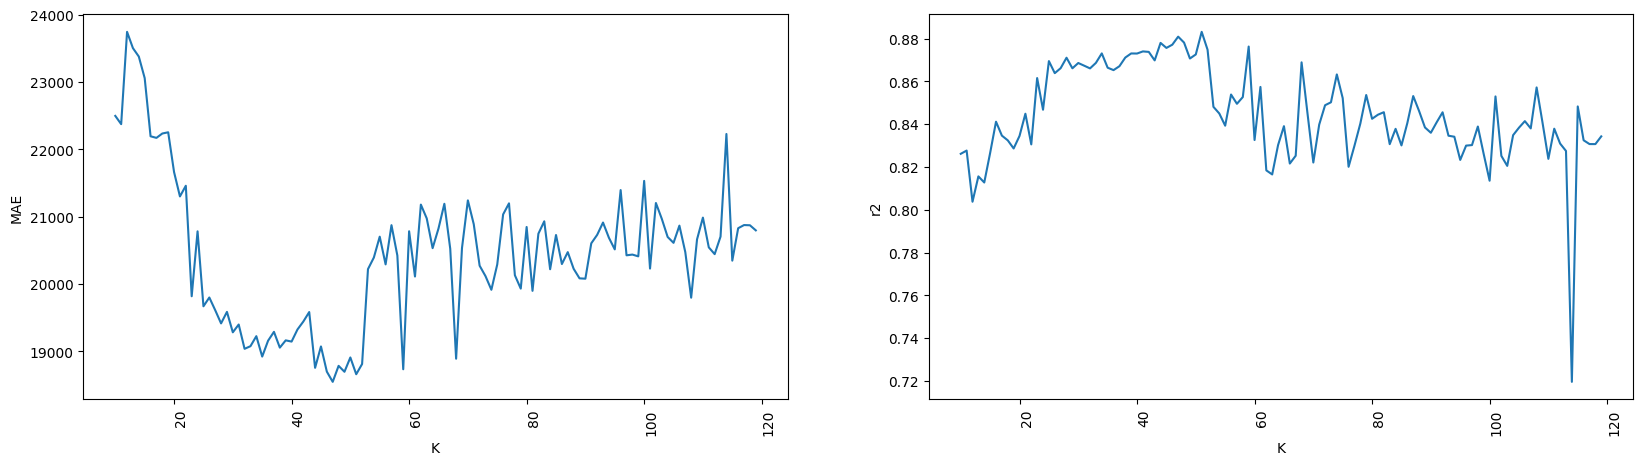

In [11]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### FEATURE SELECTION BY REMOVE FEATURE WITH LOW VARIENCE


### 1.CALCULATE VARIENCE FOR EACH FEATURE

In [12]:
varr=np.var(df)
varr

D:\miniconda\lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


MSSubClass               9.838685e-04
LotFrontage              4.121579e-04
LotArea                  1.359001e-02
OverallQual              6.131891e-04
OverallCond              4.291545e-04
                             ...     
SaleCondition_Family     2.350442e-04
SaleCondition_Normal     2.429358e-03
SaleCondition_Partial    1.656760e-03
SaleCondition_nan        0.000000e+00
SalePrice                6.306789e+09
Length: 305, dtype: float64

In [13]:
varr.loc[varr > 0.1].index

Index(['SalePrice'], dtype='object')

### 2.USING VarianceThreshold FROM SKLEARN

In [14]:
from sklearn.feature_selection import VarianceThreshold

In [15]:
varr_thresh=VarianceThreshold(threshold=0.1)
varr_thresh.fit_transform(df)
selected_columns = df.columns[varr_thresh.get_support()]
selected_columns

Index(['SalePrice'], dtype='object')

In [16]:
k, mae, rmse, r2 = [], [], [], []
for i in range(100,500):
    varr_thresh=VarianceThreshold(threshold=i/100000)
    varr_thresh.fit_transform(df.iloc[:,:-1])
    selected_columns = df.iloc[:,:-1].columns[varr_thresh.get_support()]
    df_fs=create_df(selected_columns)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,100,20548.137976,33187.497534,0.856406
1,101,20548.137976,33187.497534,0.856406
2,102,20548.137976,33187.497534,0.856406
3,103,21793.423408,33909.157328,0.850094
4,104,22244.607070,35692.936677,0.833907
...,...,...,...,...
395,495,40151.879638,63053.294606,0.481676
396,496,40151.879638,63053.294606,0.481676
397,497,40151.879638,63053.294606,0.481676
398,498,40151.879638,63053.294606,0.481676


In [17]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
0,100,20548.137976,33187.497534,0.856406
1,101,20548.137976,33187.497534,0.856406
2,102,20548.137976,33187.497534,0.856406
46,146,21164.442553,33614.865980,0.852684
45,145,21164.442553,33614.865980,0.852684
...,...,...,...,...
373,473,40429.970547,64443.550243,0.458567
372,472,40429.970547,64443.550243,0.458567
371,471,40429.970547,64443.550243,0.458567
384,484,40429.970547,64443.550243,0.458567


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_3856\873788412.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_3856\873788412.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


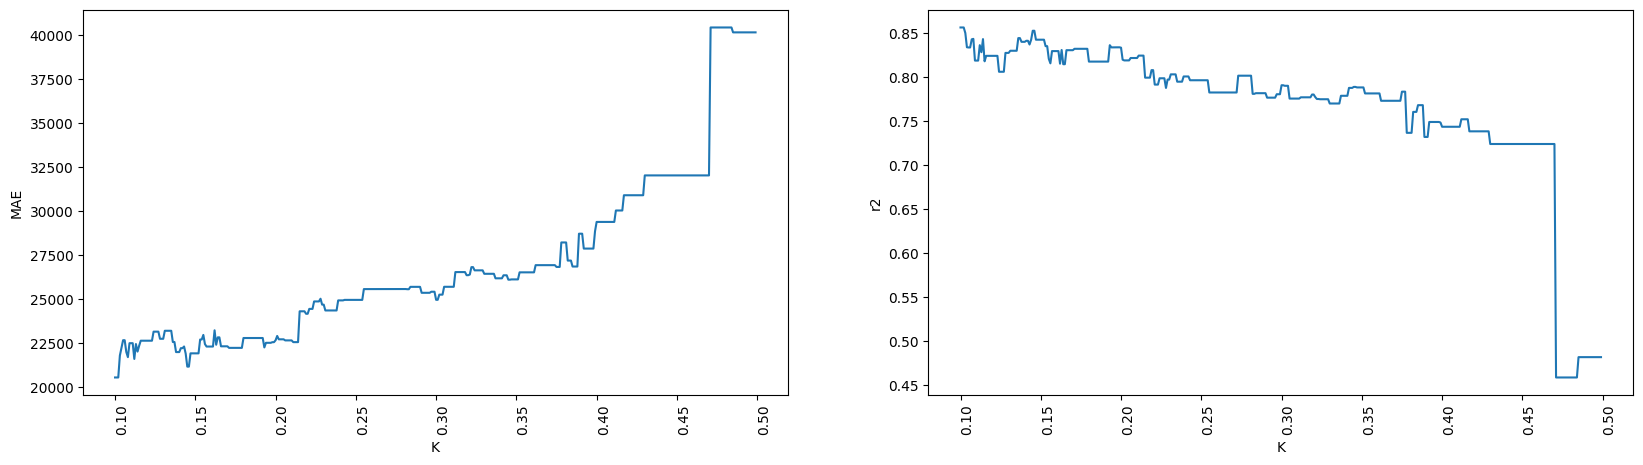

In [18]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### Univariate feature selection


### Statistic function (r_regression, f_regression, mutual_info_regression)

### 1. r_regression


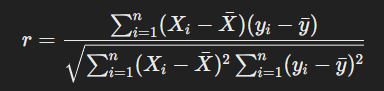

### Using numpy

In [19]:
def similitary_score(x,y):
    x_avg=np.average(x)
    y_avg=np.average(y)
    up=np.sum((x-x_avg)*(y-y_avg))
    down=np.sqrt(np.sum((x-x_avg)**2)*np.sum((y-y_avg)**2))
    return up/down

In [20]:
print(similitary_score(df["OverallQual"],df["SalePrice"]))

0.5248525198657468


In [21]:
top_feature=[]
for col in df.columns:
    score=similitary_score(df[col],df["SalePrice"])
    if col != "SalePrice" and score > 0.6:
        top_feature.append([col,score])
top_feature

C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_3856\2326211799.py:6: RuntimeWarning: invalid value encountered in scalar divide
  return up/down


[['GrLivArea', 0.6075721273224745]]

### Using sklearn

In [22]:
from sklearn.feature_selection import r_regression
from sklearn.feature_selection import SelectKBest
# for i in range(5,21):
fs=SelectKBest(r_regression,k=6)
fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
# selected=df.columns[fs.get_support()]
fs.get_feature_names_out()

array(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars',
       'GarageArea', 'BsmtQual_Ex'], dtype=object)

In [23]:
k, mae, rmse, r2 = [], [], [], []

for i in range(5,120):
    fs=SelectKBest(r_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("r_regression_label_enc.csv")
statistic


,K,MAE,RMSE,r2
0,5,23445.833082,36810.200063,0.823346
1,6,23362.721966,37490.775860,0.816754
2,7,22478.487633,36857.263811,0.822894
3,8,22664.328192,36557.965742,0.825759
4,9,22474.325199,36441.587042,0.826867
...,...,...,...,...
110,115,20750.180369,35534.092122,0.835382
111,116,20748.414235,35276.290240,0.837762
112,117,20461.289412,35097.518318,0.839402
113,118,20496.446524,34761.782357,0.842460


In [24]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
30,35,19038.601227,31768.923459,0.868420
26,31,19218.106065,35436.761125,0.836283
22,27,19420.325245,33827.439908,0.850815
24,29,19490.993381,33173.630403,0.856526
25,30,19511.229741,33886.496446,0.850294
...,...,...,...,...
7,12,23297.108764,37507.960208,0.816586
1,6,23362.721966,37490.775860,0.816754
8,13,23389.231691,37937.352045,0.812362
0,5,23445.833082,36810.200063,0.823346


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_3856\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_3856\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


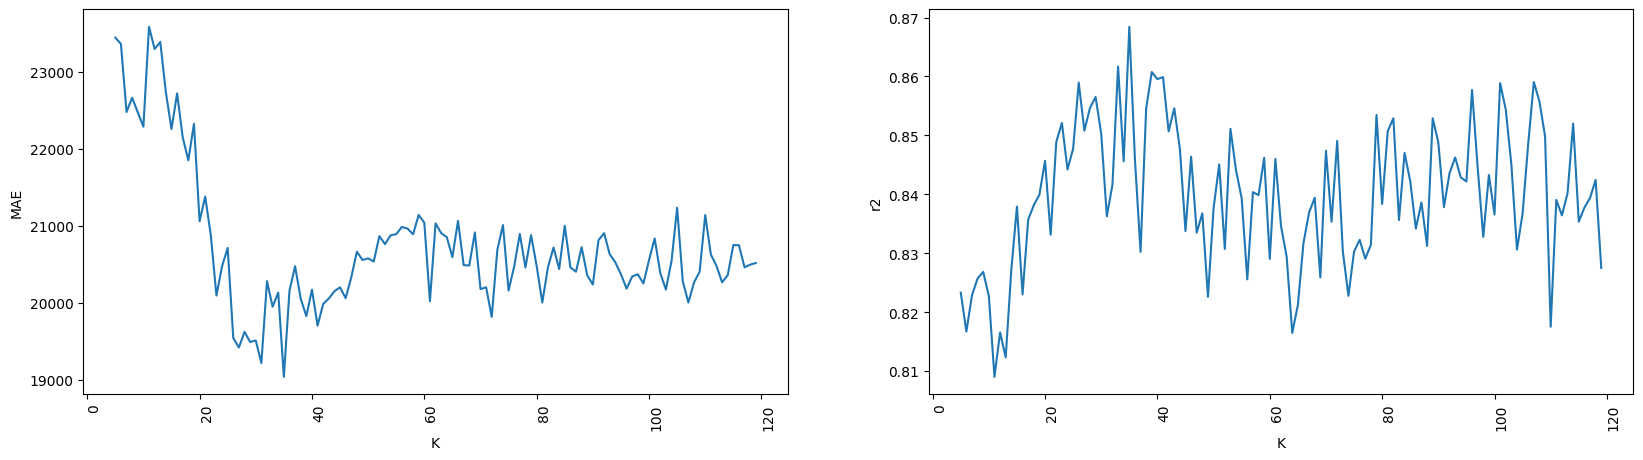

In [25]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 2.f_regression

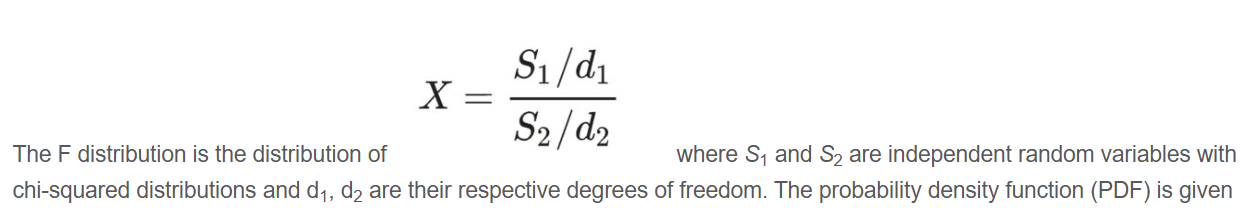

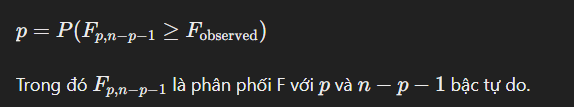

In [26]:
from sklearn.feature_selection import f_regression

In [27]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(f_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("f_regression_label_enc.csv")
statistic

,K,MAE,RMSE,r2
0,5,25706.743887,39694.857160,0.794574
1,6,25459.370956,39523.447391,0.796345
2,7,24108.357343,34587.128501,0.844039
3,8,22262.044805,33513.307461,0.853573
4,9,22613.903596,33608.863898,0.852737
...,...,...,...,...
110,115,19559.335936,31001.991343,0.874696
111,116,19945.592541,33802.548688,0.851035
112,117,19156.363012,30283.506019,0.880437
113,118,19664.503976,32549.326623,0.861876


In [28]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
58,63,17771.500989,29921.437234,0.883278
71,76,17910.756670,28908.111457,0.891050
76,81,17965.377699,28702.432535,0.892595
75,80,17980.242166,29024.037534,0.890175
68,73,18028.220419,28300.511544,0.895582
...,...,...,...,...
3,8,22262.044805,33513.307461,0.853573
4,9,22613.903596,33608.863898,0.852737
2,7,24108.357343,34587.128501,0.844039
1,6,25459.370956,39523.447391,0.796345


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_3856\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_3856\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


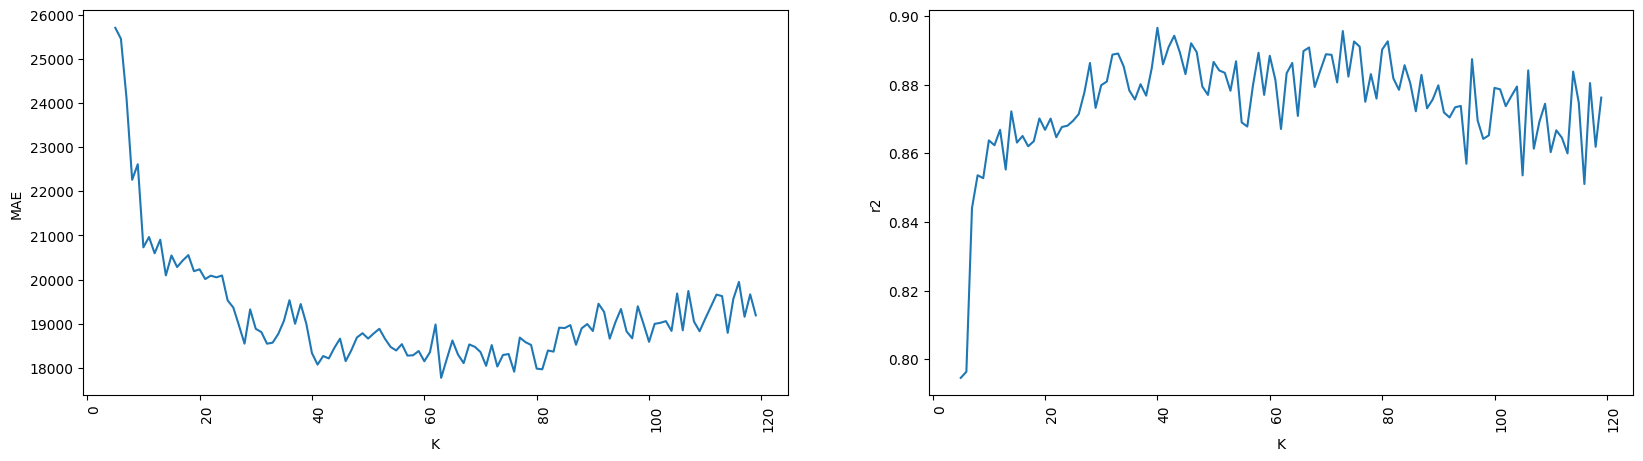

In [29]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 3.Mutual infomation

### Fomula

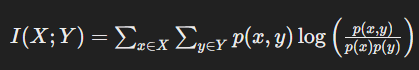

### Mesure dependency of 2 variable X,Y

### KDE method (Estimate Probability Density Function)

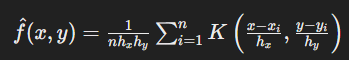

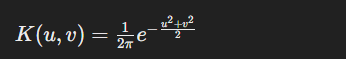

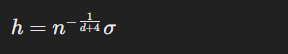

In [30]:
all_col=df.columns
all_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_WD', 'SaleType_nan', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'SaleCondition_nan',
       'SalePrice'],
      dtype='object', length=305)

In [31]:
from sklearn.feature_selection import mutual_info_regression

In [32]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(mutual_info_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,5,32237.590785,51188.447152,0.658390
1,6,29065.179263,43604.844369,0.752112
2,7,27460.951237,40959.004778,0.781282
3,8,28081.125902,41172.244875,0.778998
4,9,28079.882846,41785.423593,0.772367
...,...,...,...,...
110,115,20194.214428,33144.434046,0.856779
111,116,19704.072490,30708.784556,0.877055
112,117,19784.019801,31681.378584,0.869144
113,118,18716.804081,29122.088733,0.889432


In [33]:
statistic.to_csv("mutual_infomation_label_enc.csv")

In [34]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
70,75,17658.996600,29009.141784,0.890288
71,76,17809.448292,29842.813721,0.883891
72,77,17836.252079,29707.654631,0.884940
57,62,18388.840658,30801.284989,0.876313
53,58,18404.801735,30841.070540,0.875993
...,...,...,...,...
5,10,27734.455562,41603.976637,0.774339
4,9,28079.882846,41785.423593,0.772367
3,8,28081.125902,41172.244875,0.778998
1,6,29065.179263,43604.844369,0.752112


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_3856\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_3856\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


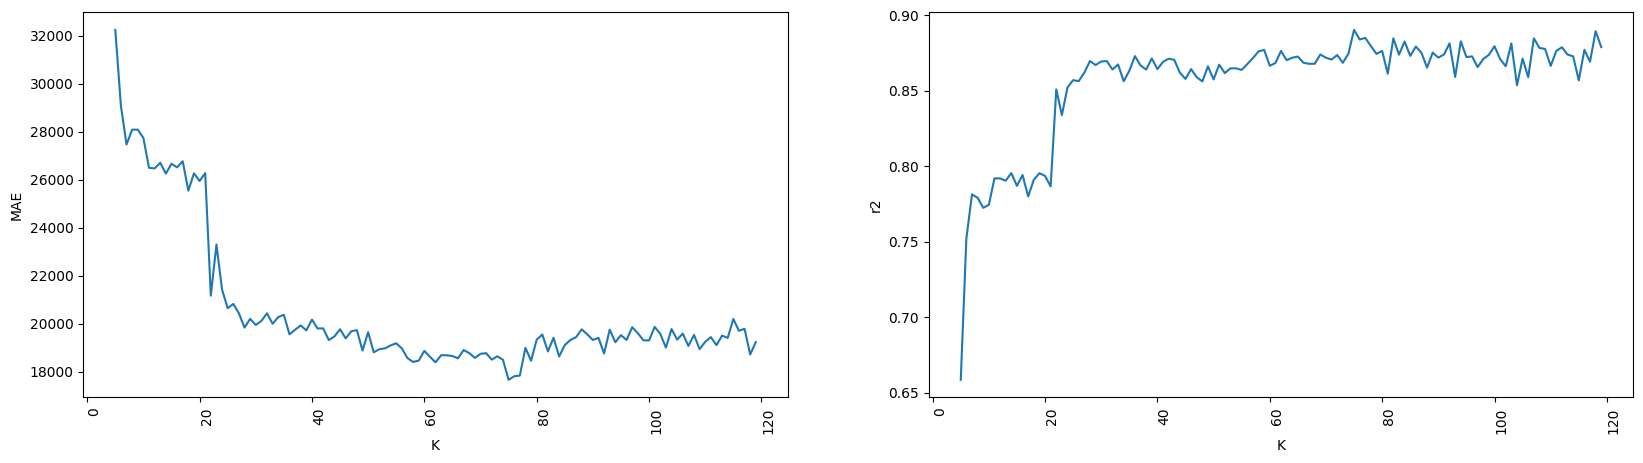

In [35]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### RFE (Recursive feature elimination)

df

from sklearn.feature_selection import RFE,RFECV
rfe=RFE(estimator=model,n_features_to_select=5)
rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
rfe.get_feature_names_out()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,50):
    rfe=RFE(estimator=model,n_features_to_select=i)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

statistic.to_csv("RFE.csv")

statistic=pd.read_csv("RFE.csv")

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,15):
    rfe=RFECV(estimator=model,min_features_to_select=i,cv=5)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

statistic.to_csv("RFECV.csv")

In [36]:
r=pd.read_csv("r_regression_label_enc.csv")
r=r.iloc[:,1:]
r

,K,MAE,RMSE,r2
0,5,23445.833082,36810.200063,0.823346
1,6,23362.721966,37490.775860,0.816754
2,7,22478.487633,36857.263811,0.822894
3,8,22664.328192,36557.965742,0.825759
4,9,22474.325199,36441.587042,0.826867
...,...,...,...,...
110,115,20750.180369,35534.092122,0.835382
111,116,20748.414235,35276.290240,0.837762
112,117,20461.289412,35097.518318,0.839402
113,118,20496.446524,34761.782357,0.842460


In [37]:
f=pd.read_csv("f_regression_label_enc.csv")
f=f.iloc[:,1:]
f

,K,MAE,RMSE,r2
0,5,25706.743887,39694.857160,0.794574
1,6,25459.370956,39523.447391,0.796345
2,7,24108.357343,34587.128501,0.844039
3,8,22262.044805,33513.307461,0.853573
4,9,22613.903596,33608.863898,0.852737
...,...,...,...,...
110,115,19559.335936,31001.991343,0.874696
111,116,19945.592541,33802.548688,0.851035
112,117,19156.363012,30283.506019,0.880437
113,118,19664.503976,32549.326623,0.861876


In [38]:
mutual=pd.read_csv("mutual_infomation_label_enc.csv")
mutual=mutual.iloc[:,1:]
mutual

,K,MAE,RMSE,r2
0,5,32237.590785,51188.447152,0.658390
1,6,29065.179263,43604.844369,0.752112
2,7,27460.951237,40959.004778,0.781282
3,8,28081.125902,41172.244875,0.778998
4,9,28079.882846,41785.423593,0.772367
...,...,...,...,...
110,115,20194.214428,33144.434046,0.856779
111,116,19704.072490,30708.784556,0.877055
112,117,19784.019801,31681.378584,0.869144
113,118,18716.804081,29122.088733,0.889432


In [39]:
joint=pd.merge(r,f,how='inner',on="K")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y
0,5,23445.833082,36810.200063,0.823346,25706.743887,39694.857160,0.794574
1,6,23362.721966,37490.775860,0.816754,25459.370956,39523.447391,0.796345
2,7,22478.487633,36857.263811,0.822894,24108.357343,34587.128501,0.844039
3,8,22664.328192,36557.965742,0.825759,22262.044805,33513.307461,0.853573
4,9,22474.325199,36441.587042,0.826867,22613.903596,33608.863898,0.852737
...,...,...,...,...,...,...,...
110,115,20750.180369,35534.092122,0.835382,19559.335936,31001.991343,0.874696
111,116,20748.414235,35276.290240,0.837762,19945.592541,33802.548688,0.851035
112,117,20461.289412,35097.518318,0.839402,19156.363012,30283.506019,0.880437
113,118,20496.446524,34761.782357,0.842460,19664.503976,32549.326623,0.861876


In [40]:
joint=pd.merge(joint,mutual,on="K",how="inner")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y,MAE,RMSE,r2
0,5,23445.833082,36810.200063,0.823346,25706.743887,39694.857160,0.794574,32237.590785,51188.447152,0.658390
1,6,23362.721966,37490.775860,0.816754,25459.370956,39523.447391,0.796345,29065.179263,43604.844369,0.752112
2,7,22478.487633,36857.263811,0.822894,24108.357343,34587.128501,0.844039,27460.951237,40959.004778,0.781282
3,8,22664.328192,36557.965742,0.825759,22262.044805,33513.307461,0.853573,28081.125902,41172.244875,0.778998
4,9,22474.325199,36441.587042,0.826867,22613.903596,33608.863898,0.852737,28079.882846,41785.423593,0.772367
...,...,...,...,...,...,...,...,...,...,...
110,115,20750.180369,35534.092122,0.835382,19559.335936,31001.991343,0.874696,20194.214428,33144.434046,0.856779
111,116,20748.414235,35276.290240,0.837762,19945.592541,33802.548688,0.851035,19704.072490,30708.784556,0.877055
112,117,20461.289412,35097.518318,0.839402,19156.363012,30283.506019,0.880437,19784.019801,31681.378584,0.869144
113,118,20496.446524,34761.782357,0.842460,19664.503976,32549.326623,0.861876,18716.804081,29122.088733,0.889432


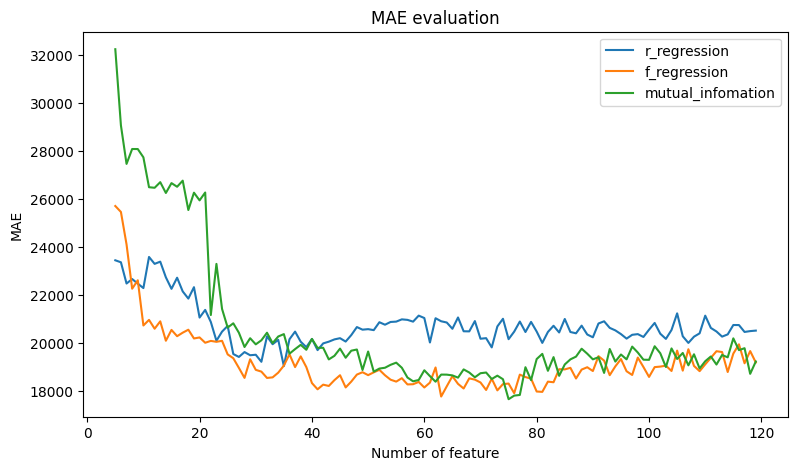

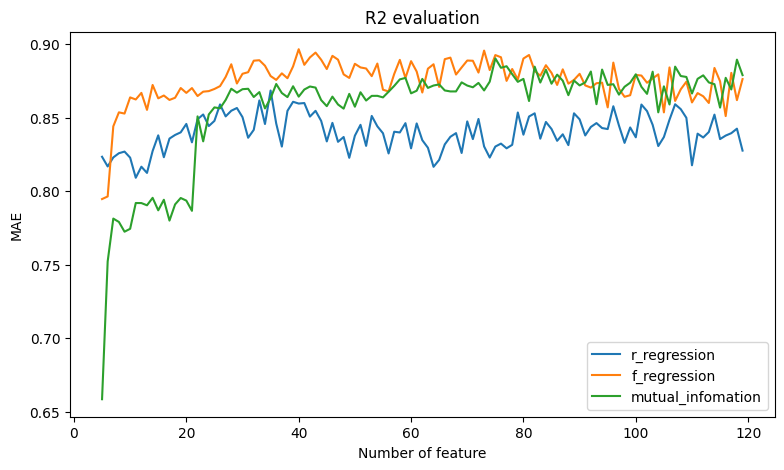

In [41]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(joint["K"],joint["MAE_x"],label="r_regression")
plt.plot(joint["K"],joint["MAE_y"],label="f_regression")
plt.plot(joint["K"],joint["MAE"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("MAE evaluation") 
plt.legend()
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(joint["K"],joint["r2_x"],label="r_regression")
plt.plot(joint["K"],joint["r2_y"],label="f_regression")
plt.plot(joint["K"],joint["r2"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("R2 evaluation") 
plt.legend()